## Species

### Prey
Table Coral                     - $\rho_1(t)$ 

Branch Coral                    - $\rho_2(t)$

### Predator
Crown of Thorns Starfish (CoT)  - $\beta(t)$ 

## Assumptions

- CoT only consumes two types of coral, Table and Branch
- CoT consumes Branch coral at a faster rate than Table coral, b>a
- Both corals grow independent of each other
- Prey will grow in the absense of predators
- Predator will encounter prey based on principles of mass action
- The effect of environmental factors, others predators, etc. is ignored
- CoT populations are contained to the Northern section of the reef

## Predator Prey System
\begin{align}
\frac{\partial \rho_1}{\partial t} &= P_1\rho_1 - a\rho_1\beta \\
\frac{\partial \rho_2}{\partial t} &= P_2\rho_2 - b\rho_2\beta \\
\frac{\partial \beta}{\partial t} &= (a\rho_1+b\rho_2)\beta - d\beta
\end{align}

In [59]:
from scipy import *
import numpy as np
from scipy.integrate import odeint
import matplotlib.animation as animation
import scipy.linalg as la
import matplotlib.pyplot as plt
from sympy.solvers import solve
from scipy.misc import derivative
from sympy import symbols
%matplotlib notebook

In [2]:
time = r_[0:200:10000j]

In [3]:
def dxdt_normal(x,t,
                a=0.13,      #CoT cosumption rate of Table coral
                b=0.87,      #CoT consumption rate of Branch coral
                d=1,         #CoT death rate
                P1=0.1,      #Table coral growth rate (in/yr)
                P2=0.8       #Branch coral growth rate (in/yr)
               ):
    '''Lotka-Volterra predator prey system.'''
    d1 = P1*x[0]-a*x[0]*x[2]
    d2 = P2*x[1]-b*x[1]*x[2]
    d3 = (a*x[0]+b*x[1])*x[2]-d*x[2]
    return(d1, d2, d3)

In [4]:
def dxdt_harvest(x,t,
                a=0.13,      #CoT cosumption rate of Table coral
                b=0.87,      #CoT consumption rate of Branch coral
                P1=0.1,      #Table coral growth rate (in/yr)
                P2=0.8       #Branch coral growth rate (in/yr)
               ):
    '''Lotka-Volterra predator prey system. All terms remain the same,
    but harvesting of the starfish by humans has been included as a
    factor d = CoT death rate'''
    d1 = P1*x[0]-a*x[0]*x[2]
    d2 = P2*x[1]-b*x[1]*x[2]
    d = (pi/2+arctan(x[2]-10))*20/pi
    d3 = (a*x[0]+b*x[1])*x[2]-d*x[2]
    return(d1, d2, d3)

In [5]:
x = odeint(dxdt_normal,[4,8,5],time)

<IPython.core.display.Javascript object>


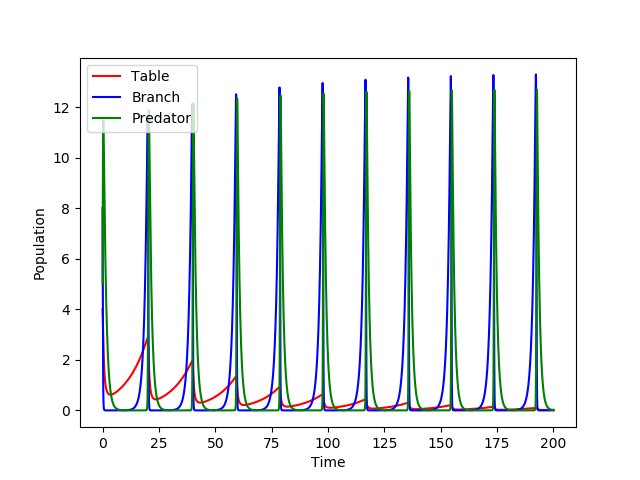

In [6]:
plt.figure()
plt.plot(time,x[:,0],'r')
plt.plot(time,x[:,1],'b')
plt.plot(time,x[:,2],'g')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(('Table','Branch','Predator'));

Solve the systme of equations without harvesting for each rate = 0

In [7]:
p1, p2, a, b, d, rho1, rho2, beta = symbols('p1 p2 a b d rho1 rho2 beta')
noHarv_simp = solve([rho1*(p1-a*beta),rho2*(p2-b*beta),beta*(a*rho1+b*rho2 -d)],[rho1,rho2,beta])
noHarv_simp

[(0, 0, 0), (0, d/b, p2/b), (d/a, 0, p1/a)]

In [36]:
def linearized(p1, p2, a, b, d, rho1, rho2, beta):
    """
    Given the paramaters of a system and the stationary points, return the linearized matrix.
    """
    m = array(([p1-a*beta,0.0,-a*rho1],[0.0,p2-b*beta,-b*rho2],[a*beta,b*beta,a*rho1+b*rho2-d]))
    return m

In [53]:
# (0,0,0)
A_1 = linearized(0.1,0.8,0.13,0.87,1.0,0,0,0)
reshape(A_1,(3,3))
roots_1 = la.eig(A_1)
det_1 = la.det(A_1)
tr_1 = np.trace(A_1)
roots_1, det_1 , tr_1, (1/4)*(tr_1**2)

((array([ 0.1+0.j,  0.8+0.j, -1.0+0.j]), array([[ 1.,  0.,  0.],
         [ 0.,  1.,  0.],
         [ 0.,  0.,  1.]])),
 -0.08000000000000002,
 -0.099999999999999978,
 0.0024999999999999988)

Since the $det(A_1)<0$, (0, d/b, p2/b) is a saddle point.

In [55]:
# (0, d/b, p2/b) 
A_2 = linearized(0.1,0.8,0.13,0.87,1.0,0,int(1/0.87),int(0.8/0.87))
reshape(A_2,(3,3))
roots_2 = la.eig(A_2)
det_2 = la.det(A_2)
tr_2 = np.trace(A_2)
roots_2, det_2, tr_2 , (1/4)*(tr_2**2)

((array([ 0.10+0.j,  0.80+0.j, -0.13+0.j]),
  array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  1.        ,  0.68315713],
         [ 0.        ,  0.        ,  0.73027141]])),
 -0.010400000000000001,
 0.77000000000000002,
 0.148225)

Since the $det(A_1)<0$, (0, d/b, p2/b) is a saddle point.

In [57]:
# (d/a, 0, p1/a) 
A_3 = linearized(0.1,0.8,0.13,0.87,1.0,int(1/0.13),0,int(0.1/0.13))
reshape(A_3,(3,3))
roots_3 = la.eig(A_3)
det_3 = la.det(A_3)
tr_3 = np.trace(A_3)
roots_3, det_3, tr_3 , (1/4)*(tr_3**2)

((array([ 0.10+0.j,  0.80+0.j, -0.09+0.j]),
  array([[ 1.        ,  0.        ,  0.97889083],
         [ 0.        ,  1.        ,  0.        ],
         [ 0.        ,  0.        ,  0.2043838 ]])),
 -0.007199999999999998,
 0.81000000000000005,
 0.16402500000000003)

Since the $det(A_1)<0$, d/a, 0, p1/a) is a saddle point.

In [10]:
y = odeint(dxdt_harvest,[4,8,5],time)

<IPython.core.display.Javascript object>


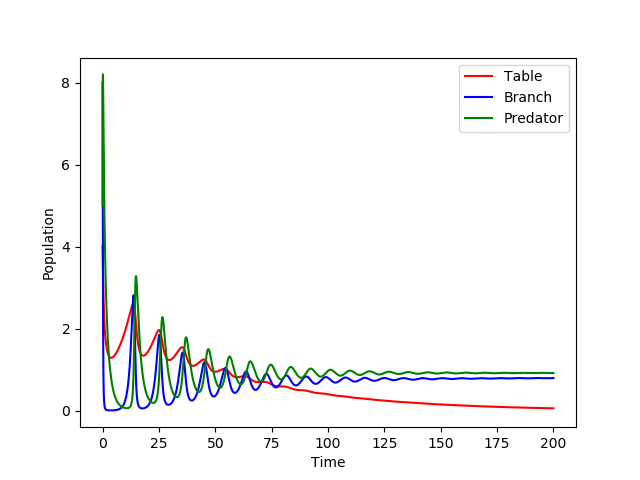

In [11]:
plt.figure()
plt.plot(time,y[:,0],'r')
plt.plot(time,y[:,1],'b')
plt.plot(time,y[:,2],'g')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(('Table','Branch','Predator'));

In [12]:
print("Table Appears to converge to:    ",average(y[:,0][-1:]))
print("Branch Appears to converge to:   ",average(y[:,1][-1:]))
print("Starfish Appears to converge to: ",average(y[:,2][-1:]))
y

Table Appears to converge to:     0.0568835569733
Branch Appears to converge to:    0.795018887894
Starfish Appears to converge to:  0.917107752307


array([[ 4.        ,  8.        ,  5.        ],
       [ 3.95302598,  7.41126343,  5.62447397],
       [ 3.90031135,  6.79218384,  6.23516735],
       ..., 
       [ 0.05692731,  0.7949511 ,  0.91707298],
       [ 0.05690543,  0.79498511,  0.91709013],
       [ 0.05688356,  0.79501889,  0.91710775]])

Above we see the graph approach some point (0.056, 0.795, 0.917).

Let us check the stability of this point ant (0,0,0)

In [60]:
def linearized_harvest(p1, p2, a, b, d, rho1, rho2, beta):
    """
    Given the paramaters of a system and the stationary points, return the linearized matrix.
    
    Here, we had to calculate the derivative with respect to beta for the harvesting quantiy
        d = (pi/2+arctan(x[2]-10))*20/pi
    """
    m = array(([p1-a*beta,0.0,-a*rho1],
               [0.0,p2-b*beta,-b*rho2],
               [a*beta,b*beta,a*rho1+b*rho2-((pi/2+arctan(beta-10))*(20/pi)+beta*(20/pi)*(1/(beta-9)))]))
    return m

In [62]:
# (0,0,0)
A_4 = linearized_harvest(0.1,0.8,0.13,0.87,1.0,0,0,0)
reshape(A_4,(3,3))
roots_4 = la.eig(A_4)
det_4 = la.det(A_4)
tr_4 = np.trace(A_4)
roots_4, det_4, tr_4 , (1/4)*(tr_4**2)

((array([ 0.10000000+0.j,  0.80000000+0.j, -0.63451035+0.j]),
  array([[ 1.,  0.,  0.],
         [ 0.,  1.,  0.],
         [ 0.,  0.,  1.]])),
 -0.05076082788888575,
 0.26548965138892822,
 0.017621188748653659)

In [63]:
# (0.056,0.795,0.917)
A_5 = linearized_harvest(0.1,0.8,0.13,0.87,1.0,0.056,0.795,0.917)
reshape(A_5,(3,3))
roots_5 = la.eig(A_5)
det_5 = la.det(A_5)
tr_5 = np.trace(A_5)
roots_5, det_5, tr_5 , (1/4)*(tr_5**2)

((array([-0.01917730+0.j        ,  0.36262973+0.65017894j,
          0.36262973-0.65017894j]),
  array([[-0.98960596+0.j        , -0.00357958+0.00609514j,
          -0.00357958-0.00609514j],
         [ 0.14373687+0.j        , -0.33024211+0.59574003j,
          -0.33024211-0.59574003j],
         [ 0.00444465+0.j        ,  0.73210929+0.j        ,  0.73210929-0.j        ]])),
 -0.010628693678436756,
 0.70608216520323297,
 0.12463800600452139)

## Spores Diffusion

\begin{align*}
\frac{d TableCoral}{dt} &= a(TableCoral) - b(TableCoral) (Starfish)\\
\frac{d BranchCoral}{dt} &= c(BranchCoral) - d(BranchCoral)(Starfish)\\
\frac{d Spores}{dt} &= e(Starfish) - Spores +\kappa \nabla^2 Spores\\
\frac{d Starfish}{dt} &= f[b(TableCoral) + d(BranchCoral)](Spores) - g(Starfish)\\
\end{align*}
#### Here we assume:
- Table Coral and Branch Coral grow indepently of eachother, a,c > 0
- Coral does not diffuse or grow into new places
- Only Starfish can eat Coral, b,d>0
- Any Starfish can produce Spores, and a lot of them e >1
- Spores are can diffuse, but Starfish cannot
- Only a small fraction of spores that interact with Coral can become starfish, 0<f<1
- Starfish die off at rate, 0<g<1
    - $g$ = constant without harvesting
    - $g$ = $(\frac{\pi}{2}+\arctan(Starfish-10))\frac{20}{\pi}$ with harvesting


In [13]:
L = 1
N = 40
x_ = linspace(0,1,N)
h = L/(N-1)

# Build a Laplacian differentiation matrix.
D2 = (diag(-2*ones(N),0)+diag(ones(N-1),-1)+diag(ones(N-1),1))
D2[0,0]=-1 ## must set boundary conditions
D2[0,1]=1 
D2[-1,-1]=-1
D2[-1,-2]=1
D2 = D2/h**2


def dxdt(x,t,
            a     = 0.10,     #Table coral growth rate (in/yr)
            b     = 0.13,     #CoT cosumption rate of Table coral
            c     = 0.87,     #Branch coral growth rate (in/yr)
            d     = 0.80,     #CoT consumption rate of Branch coral
            e     = 10.,      #Spore production per star
            f     = 0.01,     #Survival ratio of spores to adult stars
            g     = 0.10,     #Death rate of stars without coral to consume
            kappa = 0.01,     #Diffusion rate of spores
            harv  = 1.00      #Binary, 1 if harvesting is present, 0 if not
        ):
    '''Lotka-Volterra predator prey system with diffusion.
    Assume
    - Coral does not diffuse, nor do stars, relative to the size of the reef
    - Only spores stars diffuse across the reef at rate kappa
    - Only stars eat coral, babies do not consume anything
    - Table coral grows slower than branching:                        a < c
    - Table is eaten substantially slower than branching:             b < d
    - Stars live for a certain amount of time but die off gradaully, are eaten by predators, etc:  g
    - At any given time a certain amount of stars produce offspring:  e
    - At any given time a certain amount of babies reach adulthood:   f
    - There are initiatives by humans to remove Stars, but only in the case of outbreaks, FIX THIS
    '''
    table = x[:len(x)//4]
    branch = x[len(x)//4:2*len(x)//4]
    spores = x[2*len(x)//4:3*len(x)//4]
    stars = x[3*len(x)//4:]
    if(harv == 1): 
        g = (pi/2+arctan(stars-10))*20/pi
    d_table_dt  =  a*table - b*table*stars
    d_branch_dt =  c*branch - d*branch*stars
    d_spores_dt =  e*stars - spores + kappa*(D2.dot(spores))
    d_stars_dt  =  f*(b*table + d*branch)*spores - g*stars
    out = reshape(array([d_table_dt,d_branch_dt,d_spores_dt,d_stars_dt]),(len(x),))
    return(out)

In [14]:
time      = r_[0:180:1000j]
tableIC   = (1+0.5*cos(pi*x_*16))+10
branchIC  = (1-0.2*cos(pi*x_*8))+9
sporesIC  = 2*(1-cos(pi*x_)) + 10
starsIC   = zeros(N)
starsIC[:5] = 5

IC = np.reshape(np.vstack((tableIC,branchIC,sporesIC,starsIC)),(4*N,))

In [15]:
u = odeint(dxdt,IC,time)

<IPython.core.display.Javascript object>


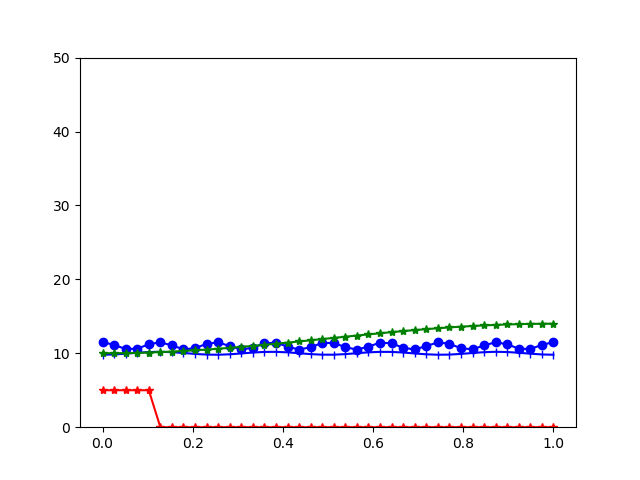

(0, 50)

In [16]:
## Plot the Initial Conditions
fig, ax = plt.subplots()
line1, = ax.plot(x_,u[0,:N],'bo-')
line2, = ax.plot(x_,u[0,N:2*N],'b|-')
line3, = ax.plot(x_,u[0,2*N:3*N],'g*-')
line4, = ax.plot(x_,u[0,3*N:],'r*-')
plt.ylim((0,50))

<IPython.core.display.Javascript object>


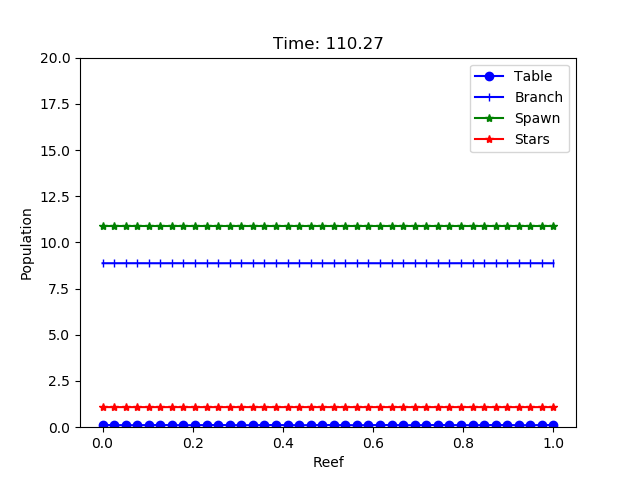

In [24]:
fig, ax = plt.subplots()
line1, = ax.plot(x_,u[0,:N],'bo-')
line2, = ax.plot(x_,u[0,N:2*N],'b|-')
line3, = ax.plot(x_,u[0,2*N:3*N],'g*-')
line4, = ax.plot(x_,u[0,3*N:],'r*-')
plt.ylim((0,20))
plt.legend(('Table','Branch','Spawn','Stars'))
plt.xlabel('Reef')
plt.ylabel('Population')

def animate(k):
    line1.set_ydata(u[k,:N])
    line2.set_ydata(u[k,N:2*N])
    line3.set_ydata(u[k,2*N:3*N])
    line4.set_ydata(u[k,3*N:])
    plt.title('Time: {0:5.2f}'.format(time[k]))
    return (line1,line2,line3,line4,)

ani = animation.FuncAnimation(fig, animate, frames=arange(1, 1000), 
                              interval=100, blit=True)

plt.show()

In [ ]:
x = r_[0:20:100j]
amp=20
PopCrit = 10
plt.figure()
plt.plot(x,(pi/2+arctan(x-PopCrit))*amp/pi)
plt.show()